In [596]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

import datasets

In [597]:

SFU_2013to2024 = pd.read_excel("EP_data_SFU.xlsx", sheet_name="SFU 2013 - 2024")
SFU_2013to2024.head()

# Merge the two dataframes on the "Backgrounds" column without adding suffixes


,Backgrounds,Signed up,Applied,Accepted,Approved,Realized,Finished,Completed,Gender,GPA,Funding,Length of Exchange,Motivation,Number of Destinations,English Proficiency,Prior International Experience,SFU Campus,Co-op Participation
0,Business administration,292,916,114,79,72,0,1,Male,3.74,Yes,10,Motivation,5,45,No,Vancouver,Yes
1,Marketing,74,377,38,28,28,0,0,Male,0.99,No,6,Cultural,4,86,Yes,Burnaby,Yes
2,Communication & journalism,69,251,36,22,21,0,0,Female,2.70,Yes,7,Career,3,19,Yes,Vancouver,No
3,Arts,47,147,32,17,16,0,0,Male,1.65,No,9,Cultural,1,43,Yes,Surrey,No
4,Economics,65,317,26,16,14,0,1,Female,4.26,No,1,Career,5,41,No,Vancouver,Yes


In [598]:
UBC_2013to2024 = pd.read_excel("EP_data_SFU.xlsx", sheet_name="UBC 2013 - 2024")
UBC_2013to2024.head()

,Backgrounds,Signed up,Applied,Accepted,Approved,Realized,Finished,Completed,Gender,GPA,Funding
0,Economics,183,997,119,51,42,0,1,Male,2.20,No
1,Business administration,225,1228,119,48,35,0,1,Male,3.88,No
2,Arts,156,530,99,46,37,0,2,Female,0.60,No
3,Psychology,148,621,82,4,33,0,2,Female,0.70,No
4,Biology,106,307,61,31,27,0,1,Male,0.44,No


In [599]:

# Merge the datasets on 'Backgrounds' without adding suffixes (using an outer join)
df = SFU_2013to2024



C:\Users\melvi\AppData\Local\Temp\ipykernel_76304\3232354508.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=campus_applied, x='SFU Campus', y='Applied', palette='colorblind')


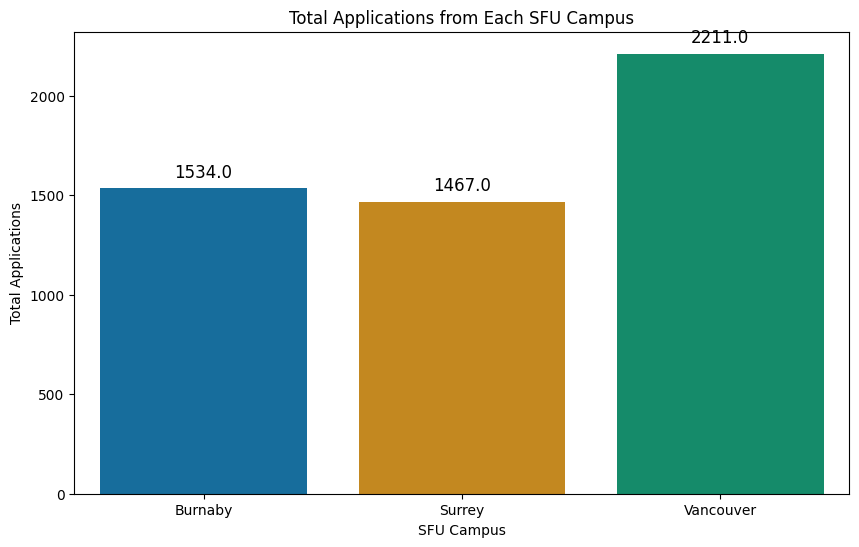

In [600]:
campus_applied = df.groupby('SFU Campus')['Applied'].sum().reset_index()

plt.figure(figsize=(10,6))
ax = sns.barplot(data=campus_applied, x='SFU Campus', y='Applied', palette='colorblind')

plt.title("Total Applications from Each SFU Campus")
plt.xlabel("SFU Campus")
plt.ylabel("Total Applications")

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                xy=(p.get_x() + p.get_width() / 2, height), 
                xytext=(0, 5), 
                textcoords='offset points', 
                ha='center', va='bottom', fontsize=12)

plt.show()

C:\Users\melvi\AppData\Local\Temp\ipykernel_76304\332188219.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=motivation_applied, x='Motivation', y='Applied', palette='Set1')


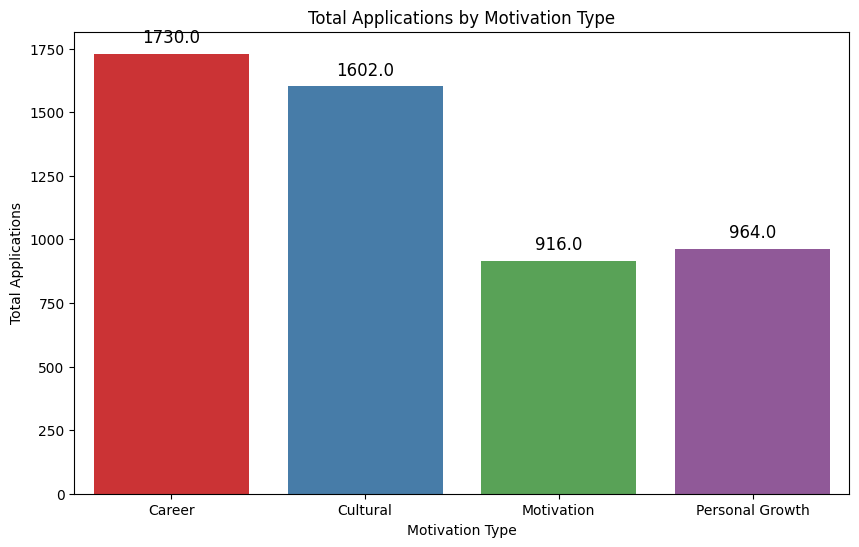

In [601]:
motivation_applied = df.groupby('Motivation')['Applied'].sum().reset_index()

plt.figure(figsize=(10,6))
ax = sns.barplot(data=motivation_applied, x='Motivation', y='Applied', palette='Set1')

plt.title("Total Applications by Motivation Type")
plt.xlabel("Motivation Type")
plt.ylabel("Total Applications")

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                xy=(p.get_x() + p.get_width() / 2, height), 
                xytext=(0, 5), 
                textcoords='offset points', 
                ha='center', va='bottom', fontsize=12)

plt.show()

Now, we will look at the correlation matrix to eliminate variables

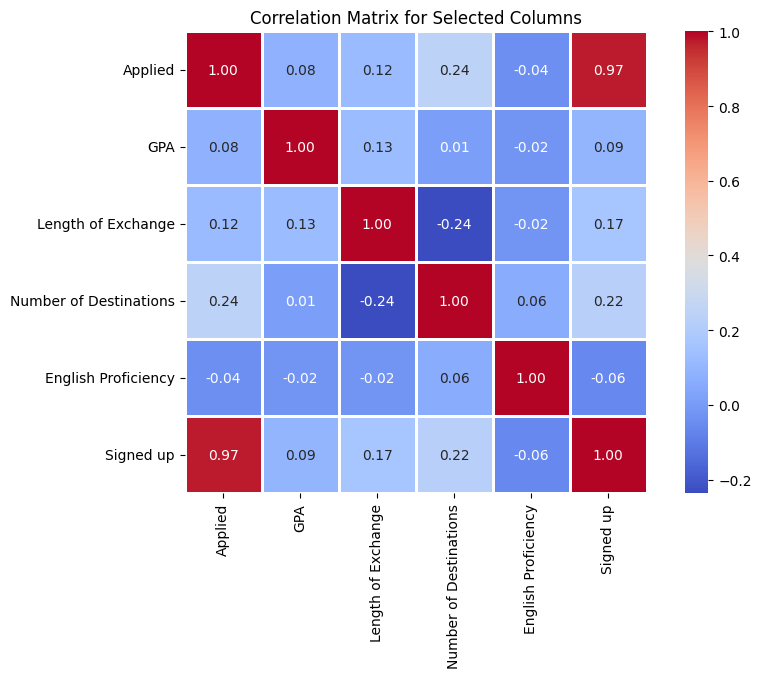

In [602]:
correlation_matrix = df[["Applied", "GPA", "Length of Exchange", "Number of Destinations", "English Proficiency", "Signed up"]].corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True, square=True, linewidths=1)
plt.title("Correlation Matrix for Selected Columns")
plt.show()

In [603]:
df.drop(['GPA', 'English Proficiency'], axis=1, inplace=True)
df.head()

,Backgrounds,Signed up,Applied,Accepted,Approved,Realized,Finished,Completed,Gender,Funding,Length of Exchange,Motivation,Number of Destinations,Prior International Experience,SFU Campus,Co-op Participation
0,Business administration,292,916,114,79,72,0,1,Male,Yes,10,Motivation,5,No,Vancouver,Yes
1,Marketing,74,377,38,28,28,0,0,Male,No,6,Cultural,4,Yes,Burnaby,Yes
2,Communication & journalism,69,251,36,22,21,0,0,Female,Yes,7,Career,3,Yes,Vancouver,No
3,Arts,47,147,32,17,16,0,0,Male,No,9,Cultural,1,Yes,Surrey,No
4,Economics,65,317,26,16,14,0,1,Female,No,1,Career,5,No,Vancouver,Yes


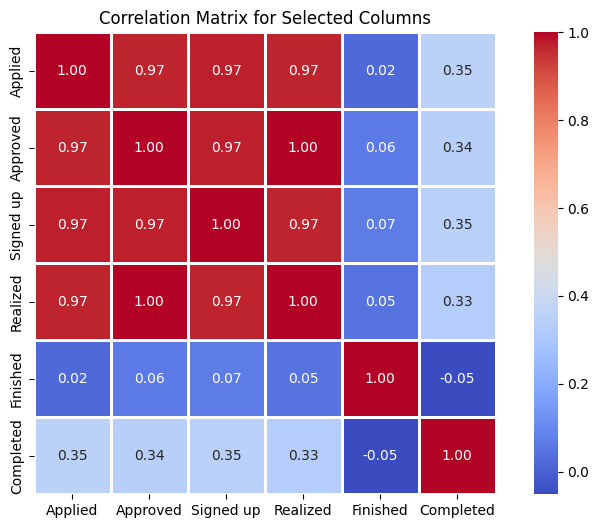

In [604]:
correlation_matrix = df[["Applied", "Approved", "Signed up", "Realized", "Finished", "Completed"]].corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True, square=True, linewidths=1)
plt.title("Correlation Matrix for Selected Columns")
plt.show()

In [605]:
df.drop(["Approved","Accepted", "Signed up", "Realized", "Finished"], axis=1, inplace=True)
df.head()


,Backgrounds,Applied,Completed,Gender,Funding,Length of Exchange,Motivation,Number of Destinations,Prior International Experience,SFU Campus,Co-op Participation
0,Business administration,916,1,Male,Yes,10,Motivation,5,No,Vancouver,Yes
1,Marketing,377,0,Male,No,6,Cultural,4,Yes,Burnaby,Yes
2,Communication & journalism,251,0,Female,Yes,7,Career,3,Yes,Vancouver,No
3,Arts,147,0,Male,No,9,Cultural,1,Yes,Surrey,No
4,Economics,317,1,Female,No,1,Career,5,No,Vancouver,Yes


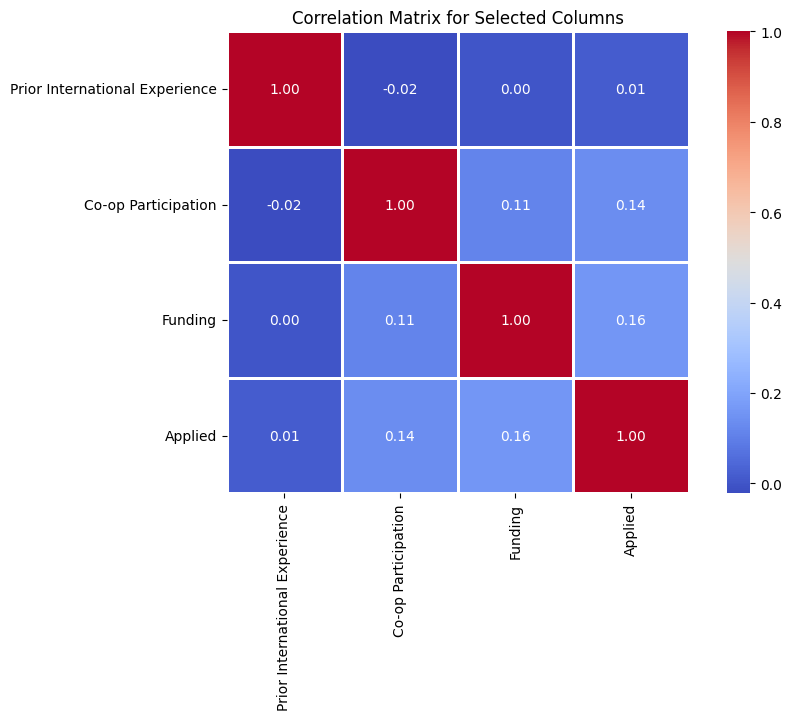

In [606]:
# Convert 'Prior International Experience' to numeric (1 for 'yes', 0 for 'no')
df['Prior International Experience'] = df['Prior International Experience'].map({'Yes': 1, 'No': 0})
df['Co-op Participation'] = df['Co-op Participation'].map({'Yes': 1, 'No': 0})
df['Funding'] = df['Funding'].map({'Yes': 1, 'No': 0})

# Calculate the correlation matrix
correlation_matrix = df[["Prior International Experience", "Co-op Participation","Funding","Applied"]].corr(numeric_only=True)

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True, square=True, linewidths=1)
plt.title("Correlation Matrix for Selected Columns")
plt.show()


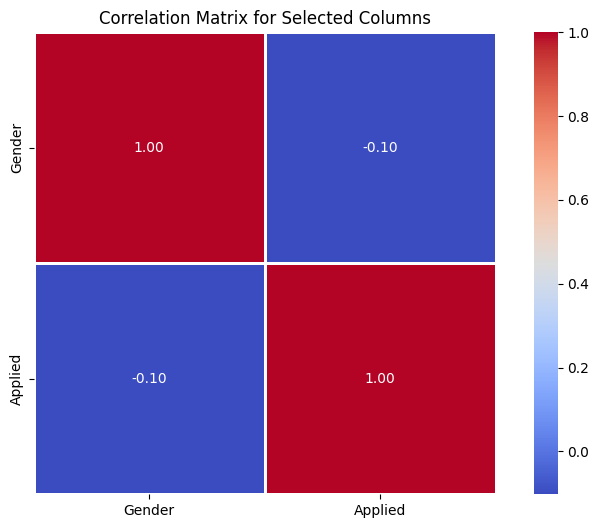

In [607]:
df['Gender'] = df['Gender'].map({'Female': 1, 'Male': 0})

# Calculate the correlation matrix
correlation_matrix = df[["Gender","Applied"]].corr(numeric_only=True)

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True, square=True, linewidths=1)
plt.title("Correlation Matrix for Selected Columns")
plt.show()

In [608]:
df.drop(["Prior International Experience", "Gender"], axis=1, inplace=True)
df.head()


,Backgrounds,Applied,Completed,Funding,Length of Exchange,Motivation,Number of Destinations,SFU Campus,Co-op Participation
0,Business administration,916,1,1,10,Motivation,5,Vancouver,1
1,Marketing,377,0,0,6,Cultural,4,Burnaby,1
2,Communication & journalism,251,0,1,7,Career,3,Vancouver,0
3,Arts,147,0,0,9,Cultural,1,Surrey,0
4,Economics,317,1,0,1,Career,5,Vancouver,1


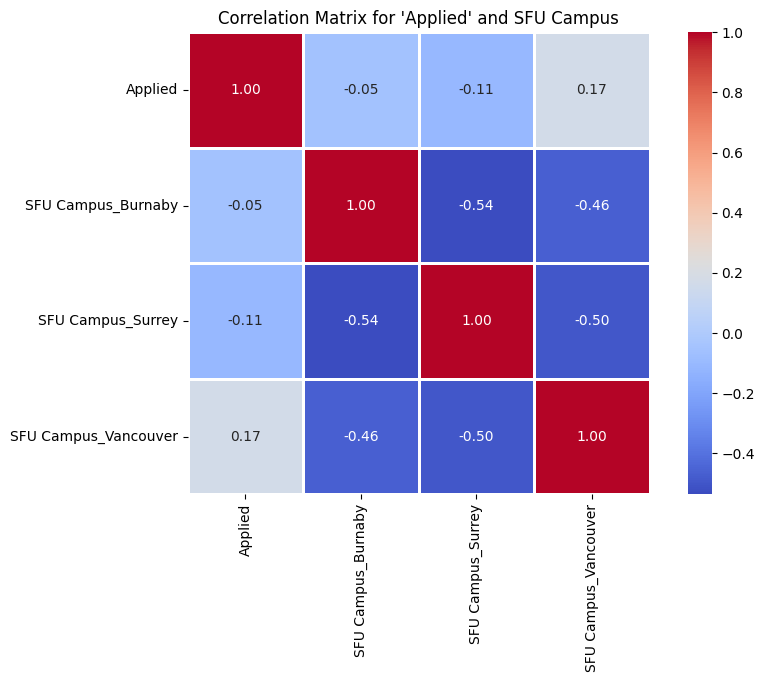

In [609]:
df_encoded = pd.get_dummies(df, columns=["SFU Campus"], drop_first=False)

# Calculate the correlation matrix for 'Applied' and encoded campus columns
correlation_matrix = df_encoded[["Applied", "SFU Campus_Burnaby", "SFU Campus_Surrey", "SFU Campus_Vancouver"]].corr(numeric_only=True)

# Plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True, square=True, linewidths=1)
plt.title("Correlation Matrix for 'Applied' and SFU Campus")
plt.show()

ANOVA F-statistic: 0.8801425002518825
ANOVA p-value: 0.4200091661076405


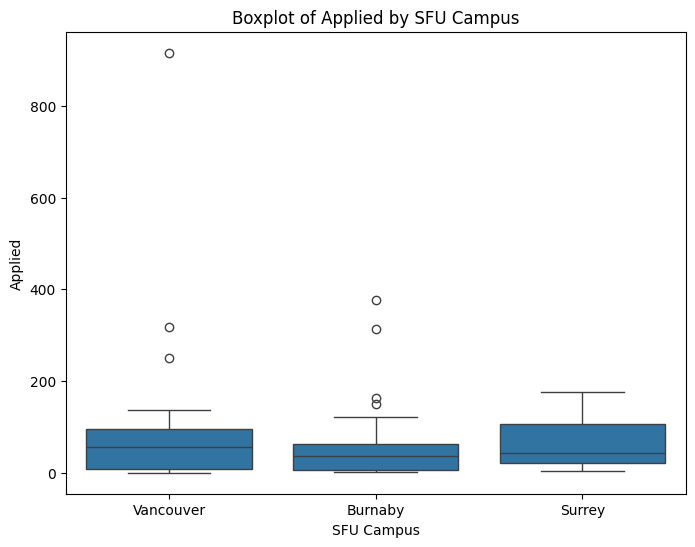

There is no significant difference in 'Applied' based on SFU Campus.


In [610]:
grouped = [df[df['SFU Campus'] == campus]['Applied'] for campus in df['SFU Campus'].unique()]

# Run the ANOVA test
f_stat, p_value = stats.f_oneway(*grouped)

# Print the result
print(f"ANOVA F-statistic: {f_stat}")
print(f"ANOVA p-value: {p_value}")

# Plotting a boxplot to visualize the differences between campuses
plt.figure(figsize=(8, 6))
sns.boxplot(x='SFU Campus', y='Applied', data=df)
plt.title('Boxplot of Applied by SFU Campus')
plt.show()

# Conclusion based on p-value
if p_value < 0.05:
    print("There is a significant difference in 'Applied' based on SFU Campus.")
else:
    print("There is no significant difference in 'Applied' based on SFU Campus.")

ANOVA F-statistic: 35.353797375078926
ANOVA p-value: 3.3134605265802367e-13


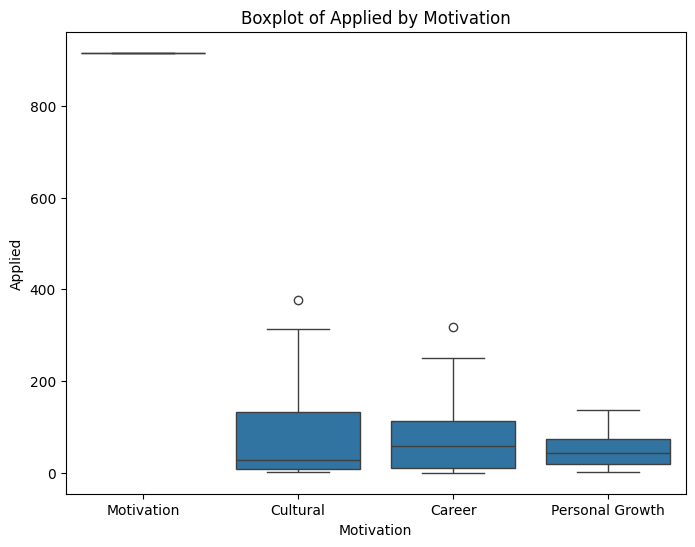

There is a significant difference in 'Applied' based on Motivation.


In [611]:
grouped = [df[df['Motivation'] == motivation]['Applied'] for motivation in df['Motivation'].unique()]

# Run the ANOVA test
f_stat, p_value = stats.f_oneway(*grouped)

# Print the result
print(f"ANOVA F-statistic: {f_stat}")
print(f"ANOVA p-value: {p_value}")

# Plotting a boxplot to visualize the differences between motivations
plt.figure(figsize=(8, 6))
sns.boxplot(x='Motivation', y='Applied', data=df)
plt.title('Boxplot of Applied by Motivation')
plt.show()

# Conclusion based on p-value
if p_value < 0.05:
    print("There is a significant difference in 'Applied' based on Motivation.")
else:
    print("There is no significant difference in 'Applied' based on Motivation.")

In [612]:
df.drop(["SFU Campus"], axis=1, inplace=True)
df.head()


,Backgrounds,Applied,Completed,Funding,Length of Exchange,Motivation,Number of Destinations,Co-op Participation
0,Business administration,916,1,1,10,Motivation,5,1
1,Marketing,377,0,0,6,Cultural,4,1
2,Communication & journalism,251,0,1,7,Career,3,0
3,Arts,147,0,0,9,Cultural,1,0
4,Economics,317,1,0,1,Career,5,1


In [613]:
df_encoded = pd.get_dummies(df, columns=['Motivation', 'Backgrounds'], drop_first=True)

# Check the first few rows of the encoded data
print(df_encoded.head())

   Applied  Completed  Funding  Length of Exchange  Number of Destinations  \
0      916          1        1                  10                       5   
1      377          0        0                   6                       4   
2      251          0        1                   7                       3   
3      147          0        0                   9                       1   
4      317          1        0                   1                       5   

   Co-op Participation  Motivation_Cultural  Motivation_Motivation  \
0                    1                False                   True   
1                    1                 True                  False   
2                    0                False                  False   
3                    0                 True                  False   
4                    1                False                  False   

   Motivation_Personal Growth  Backgrounds_Aerospace engineering  ...  \
0                       False        

In [614]:
df_encoded = pd.get_dummies(df, columns=['Motivation', 'Backgrounds'], drop_first=True)

# Check the first few rows of the encoded data
print(df_encoded.head())

   Applied  Completed  Funding  Length of Exchange  Number of Destinations  \
0      916          1        1                  10                       5   
1      377          0        0                   6                       4   
2      251          0        1                   7                       3   
3      147          0        0                   9                       1   
4      317          1        0                   1                       5   

   Co-op Participation  Motivation_Cultural  Motivation_Motivation  \
0                    1                False                   True   
1                    1                 True                  False   
2                    0                False                  False   
3                    0                 True                  False   
4                    1                False                  False   

   Motivation_Personal Growth  Backgrounds_Aerospace engineering  ...  \
0                       False        

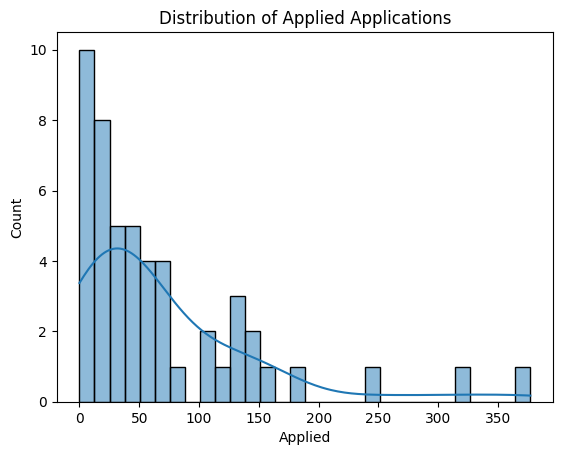

In [615]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check target variable distribution
sns.histplot(y_train, bins=30, kde=True)
plt.title("Distribution of Applied Applications")
plt.show()


In [616]:
import numpy as np

y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)


In [617]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train_log)

y_pred_log = rf_regressor.predict(X_test)
y_pred = np.expm1(y_pred_log)  # Convert back to original scale

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error after Log Transformation: {mae:.2f}")


Mean Absolute Error after Log Transformation: 130.07


In [618]:
from sklearn.ensemble import GradientBoostingRegressor

gb_regressor = GradientBoostingRegressor(n_estimators=200, learning_rate=0.05, max_depth=5, random_state=42)
gb_regressor.fit(X_train, y_train_log)

y_pred_log = gb_regressor.predict(X_test)
y_pred = np.expm1(y_pred_log)  

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error after Log Transformation (GBR): {mae:.2f}")


Mean Absolute Error after Log Transformation (GBR): 127.74


In [619]:
import pandas as pd

feature_importance = pd.Series(gb_regressor.feature_importances_, index=X_train.columns)
feature_importance = feature_importance.sort_values(ascending=False)
print(feature_importance)


Backgrounds_Audit                     0.161113
Backgrounds_International Trade       0.082582
Backgrounds_Public administration     0.075161
Backgrounds_Marketing                 0.065898
Length of Exchange                    0.061644
                                        ...   
Backgrounds_Literature                0.000000
Backgrounds_Design                    0.000000
Backgrounds_Education                 0.000000
Backgrounds_Electrical engineering    0.000000
Backgrounds_Media Arts                0.000000
Length: 70, dtype: float64


In [620]:
important_features = feature_importance[feature_importance > 0].index
X_train_filtered = X_train[important_features]
X_test_filtered = X_test[important_features]


In [621]:
from xgboost import XGBRegressor


xgb_model = XGBRegressor(n_estimators=300, learning_rate=0.05, max_depth=6, random_state=42)
xgb_model.fit(X_train_filtered, y_train_log)

y_pred_log = xgb_model.predict(X_test_filtered)
y_pred = np.expm1(y_pred_log)

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error after Feature Selection: {mae:.2f}")


Mean Absolute Error after Feature Selection: 130.30
